Alumno: Milton Aldair Martínez Acosta  

Matrícula: 1870354

Estadística Aplicada

Grupo: 051

# Tarea Modelo de Cox

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install lifelines

  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=43f5231c7b0e2aaae4b7ce4fbc785a3d571f58e111fc8fcf7ff34e01b6afa253
  Stored in directory: c:\users\2400gv\appdata\local\pip\cache\wheels\a8\03\64\8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.


# a)

In [3]:
from lifelines import*

In [32]:
df=pd.read_excel("supervivencia_examenes.xlsx")

In [33]:
df

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,0
1,2,109,1,100.0,0
2,3,118,1,100.0,0
3,4,120,1,100.0,1
4,5,106,1,98.0,1
5,6,103,1,98.0,0
6,7,108,1,96.0,1
7,8,119,1,96.0,1
8,9,115,1,96.0,1
9,10,108,1,94.0,1


In [34]:
df.groupby('género').mean()

,id,tiempo,examen,calificación
género,,,,
0,9.222222,106.666667,1.0,88.666667
1,8.750000,108.125000,1.0,93.000000


In [35]:
pd.crosstab(df['género'],df['examen'])

examen,1
género,
0,9
1,8


# b)

In [36]:
from lifelines import KaplanMeierFitter

In [40]:
kmf = KaplanMeierFitter()

In [38]:
fem = df[df['género']==1]
mas = df[df['género']==0]
tfem = fem['tiempo']
exfem = fem['examen']

tmas = mas['tiempo']
exmas = mas['examen']


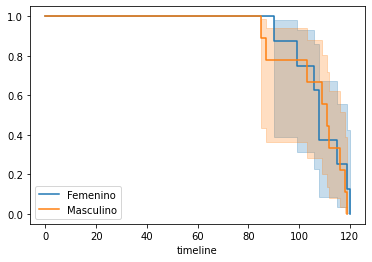

In [54]:
# Estimar función de supervivencia con intervalos de confianza
ax = plt.subplot(111)
ax = kmf.fit(tfem,exfem,label='Femenino').plot(ax = ax)
ax = kmf.fit(tmas,exmas,label='Masculino').plot(ax = ax)

# c)

In [51]:
# Funcion de supervivencia género Femenino
kmf.fit(tfem,exfem,label='Femenino')
kmf.survival_function_

,Femenino
timeline,
0.0,1.000
90.0,0.875
99.0,0.750
106.0,0.625
108.0,0.375
115.0,0.250
119.0,0.125
120.0,0.000


In [61]:
# Intervalos de confianza género Femenino
kmf.fit(tfem,exfem,label='Femenino')
kmf.confidence_interval_

,Femenino_lower_0.95,Femenino_upper_0.95
0.0,1.000000,1.000000
90.0,0.387000,0.981393
99.0,0.314807,0.930898
106.0,0.229333,0.860698
108.0,0.087006,0.674363
115.0,0.037067,0.558084
119.0,0.006593,0.422706
120.0,0.000000,0.000000


<AxesSubplot:xlabel='timeline'>

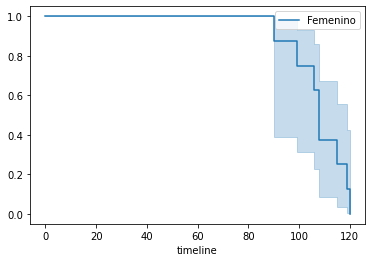

In [62]:
kmf.plot()

In [68]:
# Eventos género Femenino
kmf.fit(tfem,exfem,label='Femenino')
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,8,8
90.0,1,1,0,0,8
99.0,1,1,0,0,7
106.0,1,1,0,0,6
108.0,2,2,0,0,5
115.0,1,1,0,0,3
119.0,1,1,0,0,2
120.0,1,1,0,0,1


In [63]:
# Funcion de supervivencia género Masculino
kmf.fit(tmas,exmas,label='Masculino')
kmf.survival_function_

,Masculino
timeline,
0.0,1.000000
85.0,0.888889
87.0,0.777778
103.0,0.666667
109.0,0.555556
111.0,0.444444
112.0,0.333333
116.0,0.222222
118.0,0.111111


In [64]:
# Intervalos de confianza género Masculino
kmf.fit(tmas,exmas,label='Masculino')
kmf.confidence_interval_

,Masculino_lower_0.95,Masculino_upper_0.95
0.0,1.000000,1.000000
85.0,0.432965,0.983564
87.0,0.364751,0.939296
103.0,0.281682,0.878307
109.0,0.204242,0.804525
111.0,0.135872,0.719315
112.0,0.078289,0.622627
116.0,0.033711,0.513068
118.0,0.006129,0.387665
119.0,0.000000,0.000000


<AxesSubplot:xlabel='timeline'>

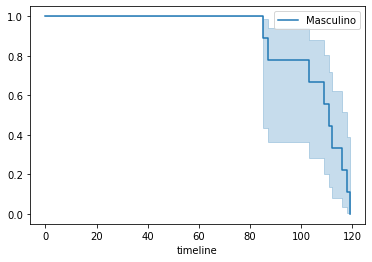

In [65]:
kmf.plot()

In [67]:
# Eventos género Masculino
kmf.fit(tmas,exmas,label='Masculino')
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,9,9
85.0,1,1,0,0,9
87.0,1,1,0,0,8
103.0,1,1,0,0,7
109.0,1,1,0,0,6
111.0,1,1,0,0,5
112.0,1,1,0,0,4
116.0,1,1,0,0,3
118.0,1,1,0,0,2


**Analizando las gráficas concluimos que el profesor se equivoca ya que los alumnos de género femenino no responden más rápido el examen.**

# d)

In [70]:
#Log - Rank Test
from lifelines.statistics import logrank_test
resultado = logrank_test(tfem, tmas, evento_obs_A = exfem, evento_obs_B = exmas)
resultado.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
      evento_obs_A = 3     1
4     1
6     1
7     1
8     1
9     1
11    1
14    1
Name: examen, dtype: int64
      evento_obs_B = 0     1
1     1
2     1
5     1
10    1
12    1
13    1
15    1
16    1
Name: examen, dtype: int64
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

Prueba de hipótesis Log - Rank Test

H0: Funciones de supervivencia iguales 

H1: Funciones de supervivencia distintas

**Como el p-valor obtenido es mayor que el nivel de significancia afirmamos que no rechazamos la hipótesis nula , es decir, la función de supervivencia del género femenino es igual estadísticamente a la del género masculino**

# e)  f)  g)  h)

In [71]:
from lifelines import CoxPHFitter

In [82]:
# Obtener el modelo
cph = CoxPHFitter()
cph.fit(df, duration_col='tiempo', event_col='examen')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2022-05-10 22:25:03 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género        -0.50       0.60       0.80            -2.08             1.07                 0.13                 2.91

               cmp to     z    p   -log2(p)
covariate                                  
id               0.00  0.42 0.67       0.57
calificación     0.00  0.47 0.64       0.64
género           0.00 -0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

<AxesSubplot:xlabel='log(HR) (95% CI)'>

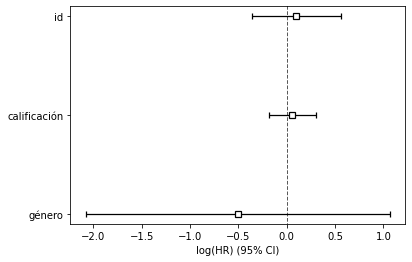

In [84]:
# Diagrama
cph.plot()

<AxesSubplot:>

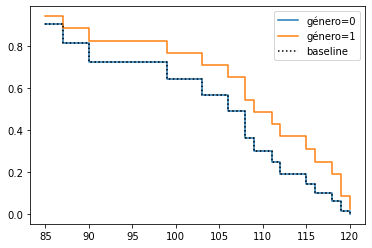

In [85]:
# Comparación Femenino vs Masculino
cph.plot_partial_effects_on_outcome(covariates='género',values=[0,1])

Prueba de hipótesis Modelo de Cox

H0: Función de riesgo igual a 0

H1: Función de riesgo diferente de 0

**Trabajando con los coeficientes de género y calificación. Concluimos que no se rechaza H0 ya que se obtuvo  un p-valor menor a alpha, podemos interpretarlo como que el tiempo de entrega del examen no se ve afectado por el género o la calificación.**

**De acuerdo con la función de supervivencia del modelo de Cox, los alumnos del genero femenino terminan más rápido el examen, al contrario de lo obtenido con el modelo de Log Rank Test.**